## Capstone Cousera Data Science
## Bogotá's traffic tickets  of 2019
### Julián Leonardo Martínez C. - Colombia

In [1]:
#Importamos la librería Pandas
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn                 as sns
from datetime import datetime, date, time, timedelta
import calendar

In [2]:
!pip install geopy
from geopy.geocoders import Nominatim

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [3]:
pip install beautifulsoup4 requests

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
from bs4 import BeautifulSoup

In [5]:
# charge the base corresponding to the 2019 Bogotá submissions base
#df_comparendos = pd.read_csv("TrafficTickets2019.csv",sep = ';',encoding = "UTF-8")
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_5edd4afaf5604ef3881d190cea9e251f = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_5edd4afaf5604ef3881d190cea9e251f = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_5edd4afaf5604ef3881d190cea9e251f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qu6bKVoaPXMDTTpXJ1-An0prKKigPBG3JBTxYUAHLSNP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_5edd4afaf5604ef3881d190cea9e251f)

body = client_5edd4afaf5604ef3881d190cea9e251f.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-hkbenww6ng3tt6',Key='TrafficTickets2019.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body,sep = ';')
df_data_1.head()

df_comparendos = df_data_1

In [6]:
# verify that the base with the 15 columns have been loaded correctly
df_comparendos.head()

,LONGITUD,LATITUD,OBJECTID,PLACA,NUM_COMPARENDO,FECHA,HORA,MES,MEDIO_DETECCION,CLASE_VEHICULO,TIPO_SERVICIO,INFRACCION,VALOR,LOCALIDAD,DIRECCION
0,-74.073786,4.605015,3640583,RBU104,11001000000022771974,2019-01-02,15:55:49,ENERO,DEAP,Automóvil,Particular,C02,414058,Santa Fé,CR 9 CL 17
1,-74.080858,4.604758,3640584,REL688,11001000000022771915,2019-01-02,15:13:36,ENERO,DEAP,Automóvil,Particular,C02,414058,Los Mártires,CL 13 CR 15- 08
2,-74.059752,4.660537,3640585,REZ644,11001000000022771901,2019-01-02,14:58:55,ENERO,DEAP,Automóvil,Particular,C02,414058,Chapinero,CL 74 CR 14-09
3,-74.093379,4.647129,3640586,RFM431,11001000000022771887,2019-01-02,14:49:34,ENERO,DEAP,Campero,Particular,C02,414058,Teusaquillo,CL 44 CR 57 34
4,-74.060375,4.665155,3640587,RHV483,11001000000022771954,2019-01-02,15:36:34,ENERO,DEAP,Automóvil,Particular,C02,414058,Chapinero,TR 18 CL 78


### I check the name of the base columns

In [7]:
df_comparendos.columns

Index(['LONGITUD', 'LATITUD', 'OBJECTID', 'PLACA', 'NUM_COMPARENDO', 'FECHA',
       'HORA', 'MES', 'MEDIO_DETECCION', 'CLASE_VEHICULO', 'TIPO_SERVICIO',
       'INFRACCION', 'VALOR', 'LOCALIDAD', 'DIRECCION'],
      dtype='object')

### Consult the total records of the database

In [8]:
df_comparendos.shape

(402500, 15)

### Now I carry out a series of queries to identify which variables are the ones that have the greatest influence on the possibility of generating a traffic ticket.

In [9]:
# import fundamental plotting library in Python
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as colors
# 
# Instruct jupyter to plot in the notebook
%matplotlib inline

### Total appeals by borough (Bar Chart)

LOCALIDAD
Kennedy         28659
Teusaquillo     32517
Los Mártires    34888
Fontibón        40571
Chapinero       40752
Name: INFRACCION, dtype: int64


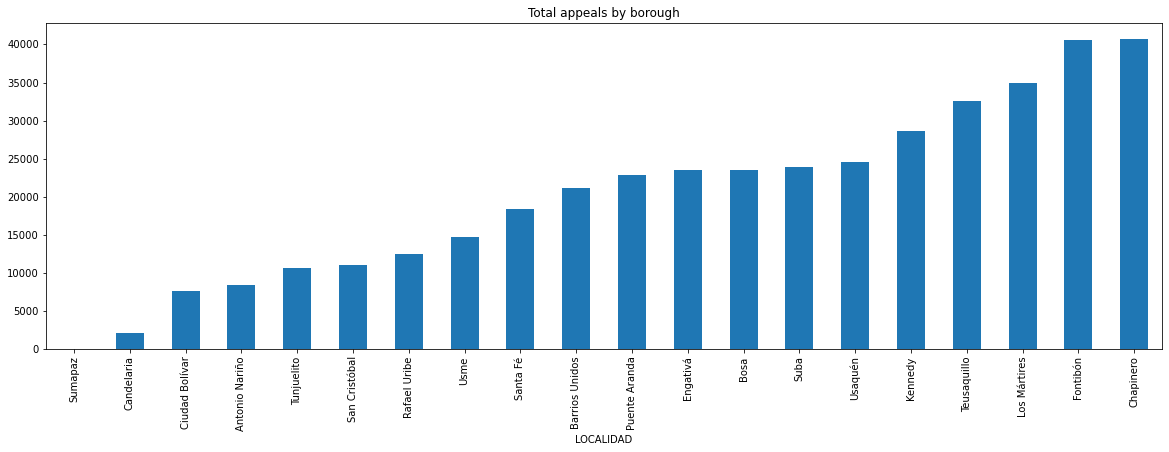

In [10]:
df_temp = df_comparendos.groupby('LOCALIDAD')['INFRACCION'].count().sort_values();
print(df_temp.tail())
pyplot.figure(figsize=(20,6))
df_temp.plot.bar(title='Total appeals by borough');

#### Although the boroughs of Fontibon and Chapinero top the list, they are also two of the towns with the highest population and displacement, therefore the inside town is weakly in the possibility of generating a traffic ticket.

# ----------------------------------------
### Proportion of type of submissions

INFRACCION
D12      5339
C38      6063
B01      6836
H03     12119
C24     12272
C35     12761
G02     13702
C31     17416
C14     19829
C02    236176
Name: INFRACCION, dtype: int64


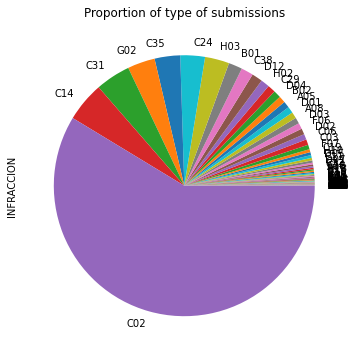

In [11]:
pyplot.figure(figsize=(20,6))
df_temp = df_comparendos.groupby('INFRACCION')['INFRACCION'].count().sort_values()
df_temp.plot.pie(title='Proportion of type of submissions');
print(df_temp.tail(10))

#### Traffic ticket type C02 "Parking a vehicle in prohibited places" is the comparison with the highest number of infractions (58.67%)

# -----------------------------------------------------
### Chart by vehicle class (pie chart)

TOTAL TRAFFIC TICKETS BY VEHICLE CLASS
CLASE_VEHICULO
Bicicleta       17761
Campero         18807
Camioneta       62588
Motocicleta     82729
Automóvil      199338
Name: INFRACCION, dtype: int64


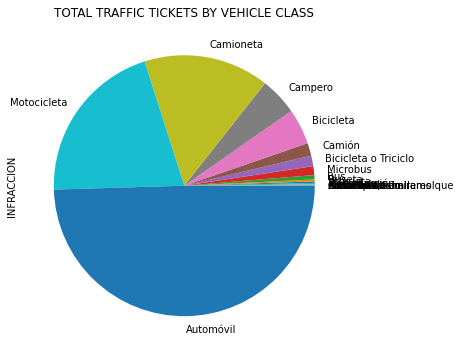

In [12]:
pyplot.figure(figsize=(15,6))
df_temp = df_comparendos.groupby('CLASE_VEHICULO')['INFRACCION'].count().sort_values()
print("TOTAL TRAFFIC TICKETS BY VEHICLE CLASS")
print(df_temp.tail())
df_temp.plot.pie(title='TOTAL TRAFFIC TICKETS BY VEHICLE CLASS');

### Total Collected by vehicle class (bar chart)

CLASE_VEHICULO
Camión          2520784986
Campero         7894871411
Camioneta      26023903708
Motocicleta    36147702437
Automóvil      82579036408
Name: VALOR, dtype: int64


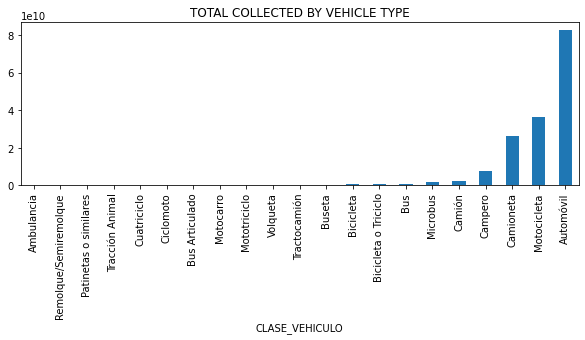

In [13]:
pyplot.figure(figsize=(10,3))
df_temp = df_comparendos.groupby('CLASE_VEHICULO')['VALOR'].sum().sort_values()
print(df_temp.tail())
df_temp.plot.bar(title='TOTAL COLLECTED BY VEHICLE TYPE');

### Average value of the traffic tickets by vehicle class

CLASE_VEHICULO
Bicicleta                 32989.029447
Bicicleta o Triciclo     116827.455684
Patinetas o similares    133959.617647
Ciclomoto                222193.888889
Remolque/Semiremolque    230032.000000
Tracción Animal          241771.620690
Mototriciclo             375703.108772
Cuatriciclo              379553.125000
Volqueta                 382900.435631
Camión                   397600.155521
Tractocamión             402349.491275
Motocarro                405360.876712
Bus Articulado           405564.492308
Ambulancia               414058.000000
Automóvil                414266.403837
Camioneta                415797.017128
Campero                  419783.666241
Microbus                 421744.423893
Bus                      431279.797480
Buseta                   435075.553552
Motocicleta              436941.126292
Name: VALOR, dtype: float64


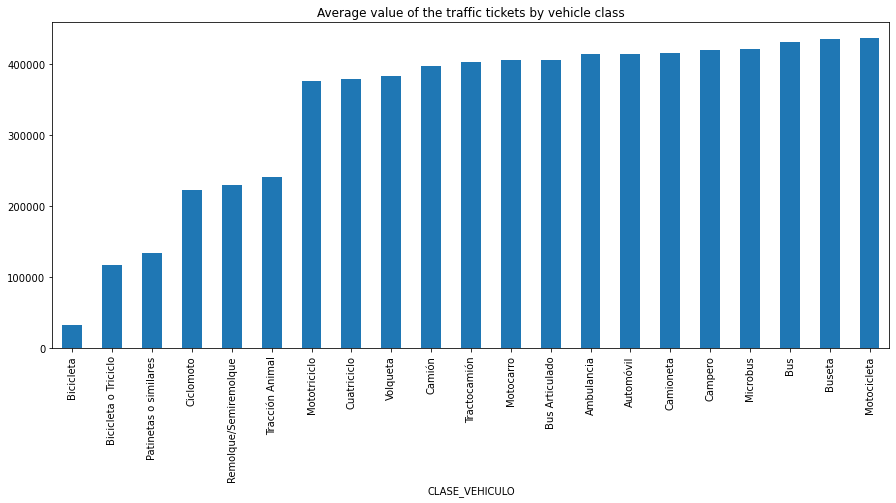

In [14]:
pyplot.figure(figsize=(15,6))
df_comparendos_promedio = df_comparendos.groupby('CLASE_VEHICULO')['VALOR'].mean().sort_values()
print(df_comparendos_promedio)
df_comparendos_promedio.plot.bar(title='Average value of the traffic tickets by vehicle class');

### When looking at the value of the purchase and the type of vehicle, a significant increase is observed in the number of applications for motorcycles, surpassing the average for cars.
### Although bicycles have a significant number of tickets, the total value of tickets decreases as they are of little value.

### ---------------------------------
### Graph by month the total of infractions

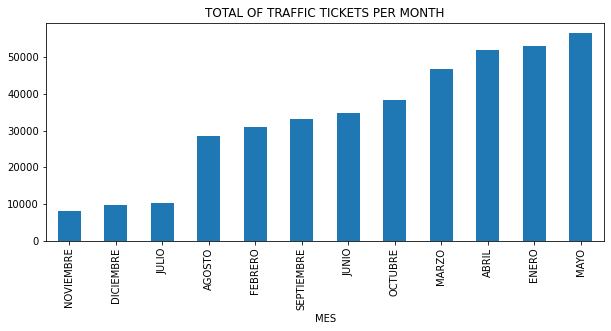

In [15]:
#Total 
pyplot.figure(figsize=(10,4))
df_comparendos.groupby('MES')['INFRACCION'].count().sort_values().plot.bar(title='TOTAL OF TRAFFIC TICKETS PER MONTH');

### In the holiday months (November, December and July) there are fewer traffic tickets, this is because many city dwellers travel to other places, reducing the number of tickets

## --------------------------
### Now it is queried by the time of day intervals

In [16]:
#I create a column that groups the date and time
df_comparendos["FECHAF"] = df_comparendos["FECHA"] +' '+ df_comparendos["HORA"]
df_comparendos['FECHAF'] = pd.to_datetime(df_comparendos['FECHAF'])

#I create another column that approximates the time to the nearest 20 minute interval
df_comparendos['HORAF'] = df_comparendos['FECHAF'].apply(lambda dt: datetime(dt.year, dt.month, dt.day, dt.hour,20*(dt.minute // 20)))

In [17]:
df_comparendos['HORAF1'] = df_comparendos['HORAF'].dt.strftime('%Y-%m-%d:%H:%M')
hora_list = []
for i in df_comparendos['HORAF1']:
    hora_list.append(i[11:20])
df_comparendos['HORA_C'] = hora_list

In [18]:
del df_comparendos['HORAF1']
del df_comparendos['HORAF']

In [19]:
# Create column HORA
list = []
for i in df_comparendos['HORA']:
   hour = i.split(":")
   list.append(int(hour[0]))
df_comparendos['HH'] = list

# Create column of type traffic ticket
list = []
for i in df_comparendos['INFRACCION']:
   tipo = i[:1]
   list.append(tipo)
df_comparendos['COMP_TIPO'] = list

list = []
for i in df_comparendos['FECHAF']:
    semana = i.strftime('%w')
    semana = semana.replace('0','Dom').replace('1','Lun').replace('2','Mar').replace('3','Mie').replace('4','Jue').replace('5','Vie').replace('6','Sab')
    list.append(semana)
df_comparendos['SEMANA'] = list

### Graph for an average day

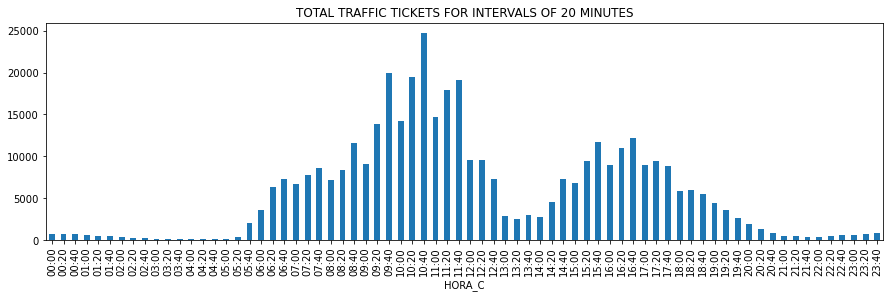

In [20]:
pyplot.figure(figsize=(15,4))
df_comparendos.groupby('HORA_C')['INFRACCION'].count().plot.bar(title='TOTAL TRAFFIC TICKETS FOR INTERVALS OF 20 MINUTES');

### The hours with the highest violations are the so-called "off-peak hours" where 2 groups are highlighted from 08:40 to 12:40 and from 14:40 to 17:40

# -----------------------------------
### Consult for the different traffic tickets to C02

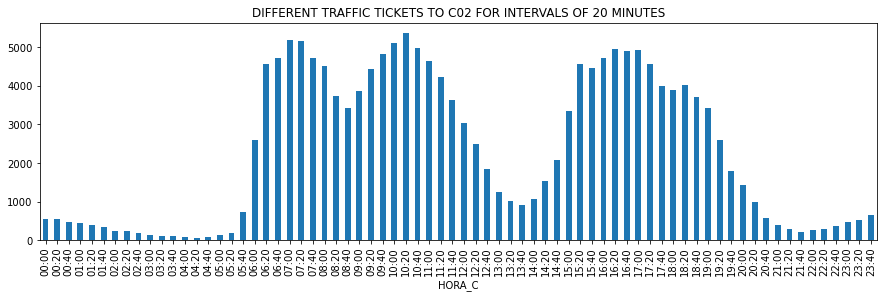

In [21]:
## SE GRAFICA POR UN DIA EN ESPECIFICO
pyplot.figure(figsize=(15,4))
df_temp = df_comparendos[df_comparendos['INFRACCION'] != 'C02'].copy()
df_temp.groupby('HORA_C')['INFRACCION'].count().plot.bar(title='DIFFERENT TRAFFIC TICKETS TO C02 FOR INTERVALS OF 20 MINUTES');

### Traffic Tickets other than C02 are maintained with a lesser difference during working hours with the exception of midday

## -----------------------------------
### Now the consultation for the Traffic Ticket Type F: Driving while intoxicated or under the influence of hallucinogenic substances

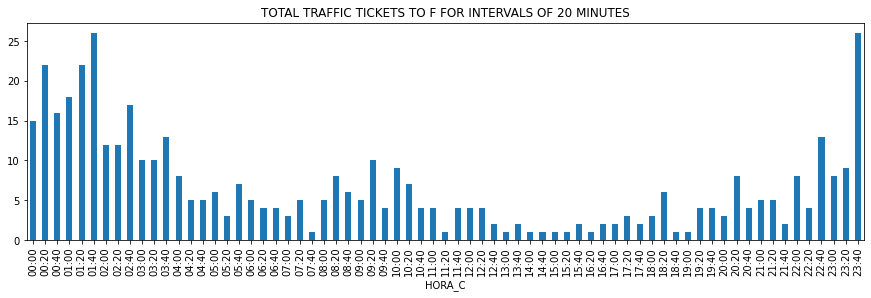

In [22]:
pyplot.figure(figsize=(15,4))
df_temp = df_comparendos[df_comparendos['INFRACCION'] == 'F'].copy()
df_temp.groupby('HORA_C')['INFRACCION'].count().plot.bar(title='TOTAL TRAFFIC TICKETS TO F FOR INTERVALS OF 20 MINUTES');

### This type of fine, unlike the others, has a greater amount at night and early morning hours.

## --------------------------------
### The class of vehicles is analyzed by boxes against the hours of the Traffic Tickets type F

CLASE_VEHICULO
Campero         13
Camioneta       42
Motocicleta    190
Automóvil      211
Name: INFRACCION, dtype: int64


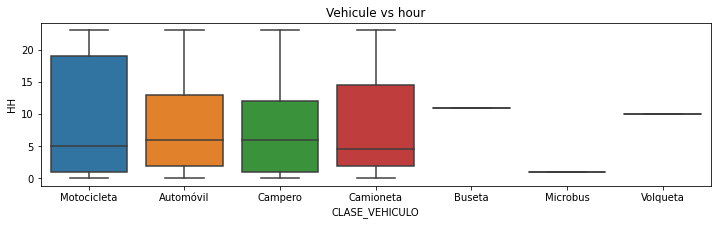

In [23]:
pyplot.figure(figsize=(12,3))
df_temp = df_comparendos[df_comparendos['INFRACCION'] == 'F'].copy()
pyplot.title("Vehicule vs hour")
sns.boxplot(x='CLASE_VEHICULO',y='HH', data = df_temp)
df_temp = df_temp.groupby('CLASE_VEHICULO')['INFRACCION'].count().sort_values()
print(df_temp.tail(4))

### For this traffic ticket, the longest interval starts at 22:00 until 05:40, where motorcycles commit this ticket regularly during the day.

## -------------------------------
### Box chart to consult the hours of the Traffic Ticket type F by day of the week

SEMANA
Mie     27
Jue     35
Lun     36
Mar     37
Vie     48
Dom    112
Sab    164
Name: INFRACCION, dtype: int64


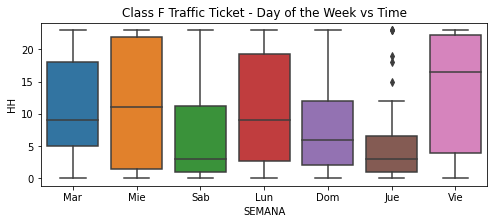

In [24]:
df_F = df_comparendos[df_comparendos['INFRACCION'] == 'F'].copy()
pyplot.figure(figsize=(8,3))
pyplot.title("Class F Traffic Ticket - Day of the Week vs Time")
sns.boxplot(x='SEMANA',y='HH', data = df_F)
df_temp = df_F.groupby('SEMANA')['INFRACCION'].count().sort_values()
print(df_temp)

### Saturday morning is the time of the week when the infraction type F (Driving while intoxicated or under the influence of hallucinogenic substances) is most committed

## -------------------------------------
### Regression of results by borough and type of traffic ticket

In [25]:
modelo = 'HH~LOCALIDAD+SEMANA'
lm    = sm.ols(formula = modelo, data = df_F).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     HH   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.993
Date:                Fri, 14 May 2021   Prob (F-statistic):            0.00384
Time:                        04:31:57   Log-Likelihood:                -1597.4
No. Observations:                 459   AIC:                             3245.
Df Residuals:                     434   BIC:                             3348.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### As the dependent variable is the hour of the ticket, the borough and the day of the week of the traffic tickets type F are taken, it is concluded that there is only a dependency of 9.9%

In [26]:
df_comparendos.head()

,LONGITUD,LATITUD,OBJECTID,PLACA,NUM_COMPARENDO,FECHA,HORA,MES,MEDIO_DETECCION,CLASE_VEHICULO,TIPO_SERVICIO,INFRACCION,VALOR,LOCALIDAD,DIRECCION,FECHAF,HORA_C,HH,COMP_TIPO,SEMANA
0,-74.073786,4.605015,3640583,RBU104,11001000000022771974,2019-01-02,15:55:49,ENERO,DEAP,Automóvil,Particular,C02,414058,Santa Fé,CR 9 CL 17,2019-01-02 15:55:49,15:40,15,C,Mie
1,-74.080858,4.604758,3640584,REL688,11001000000022771915,2019-01-02,15:13:36,ENERO,DEAP,Automóvil,Particular,C02,414058,Los Mártires,CL 13 CR 15- 08,2019-01-02 15:13:36,15:00,15,C,Mie
2,-74.059752,4.660537,3640585,REZ644,11001000000022771901,2019-01-02,14:58:55,ENERO,DEAP,Automóvil,Particular,C02,414058,Chapinero,CL 74 CR 14-09,2019-01-02 14:58:55,14:40,14,C,Mie
3,-74.093379,4.647129,3640586,RFM431,11001000000022771887,2019-01-02,14:49:34,ENERO,DEAP,Campero,Particular,C02,414058,Teusaquillo,CL 44 CR 57 34,2019-01-02 14:49:34,14:40,14,C,Mie
4,-74.060375,4.665155,3640587,RHV483,11001000000022771954,2019-01-02,15:36:34,ENERO,DEAP,Automóvil,Particular,C02,414058,Chapinero,TR 18 CL 78,2019-01-02 15:36:34,15:20,15,C,Mie


# ---------------
# FourSquare
# ---------------

### The geograpical coordinate of Bogotá

In [27]:
#!conda install -c conda-forge folium=0.5.0
!pip install folium
import folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [28]:
address = 'Bogotá'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bogotá are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bogotá are 4.6533326, -74.083652.


### The following map shows the points where traffic ticket type "F" (by Driving while intoxicated or under the influence of hallucinogenic substances)  were made

In [29]:
# create map of Manhattan using latitude and longitude values
map_bogota = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_F['LATITUD'], df_F['LONGITUD'], df_F['LOCALIDAD']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bogota)  
    
map_bogota

In [30]:
CLIENT_ID = '0PGNIRKSWSIAK2NGMRXX4FF210CFE5CUB0HXZOWPF2ICMUHW' # your Foursquare ID
CLIENT_SECRET = '3ZLHSYMRO0YV5VCWDILGJVIDXBVCCZ1UMYRFTGTPNNHHLNBF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0PGNIRKSWSIAK2NGMRXX4FF210CFE5CUB0HXZOWPF2ICMUHW
CLIENT_SECRET:3ZLHSYMRO0YV5VCWDILGJVIDXBVCCZ1UMYRFTGTPNNHHLNBF


In [31]:
#Second keys
CLIENT_ID = 'EA24PWBDYH1ZZQBWDRQEOGZVDDUEAYKHZ3OOTVGFP3CLRJ0T'
CLIENT_SECRET = 'FROZNBYP2JUVWRWEB2B0RLIL4UDMX30TEJWL25PBF421VTYC' 
VERSION = '20211005'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EA24PWBDYH1ZZQBWDRQEOGZVDDUEAYKHZ3OOTVGFP3CLRJ0T
CLIENT_SECRET:FROZNBYP2JUVWRWEB2B0RLIL4UDMX30TEJWL25PBF421VTYC


In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
bogota_venues_original = getNearbyVenues(names=df_F['LOCALIDAD'],
                                         latitudes=df_F['LATITUD'],
                                         longitudes=df_F['LONGITUD']
                                        )

Puente Aranda
Kennedy
San Cristóbal
Bosa
Los Mártires
Bosa
San Cristóbal
Kennedy
Barrios Unidos
Tunjuelito
Suba
Usaquén
Bosa
Bosa
Fontibón
Usaquén
Barrios Unidos
Bosa
San Cristóbal
Chapinero
Engativá
Chapinero
Usaquén
Barrios Unidos
Antonio Nariño
Ciudad Bolívar
Barrios Unidos
Bosa
Antonio Nariño
Kennedy
Barrios Unidos
Usaquén
Kennedy
Los Mártires
Antonio Nariño
Antonio Nariño
Antonio Nariño
Tunjuelito
San Cristóbal
Kennedy
Kennedy
Kennedy
Suba
Fontibón
Kennedy
Engativá
Suba
Antonio Nariño
Barrios Unidos
Santa Fé
Fontibón
Suba
Engativá
Antonio Nariño
Los Mártires
Suba
Fontibón
Tunjuelito
Fontibón
Santa Fé
Engativá
Kennedy
Los Mártires
Suba
Antonio Nariño
Chapinero
Los Mártires
Tunjuelito
Santa Fé
Tunjuelito
Suba
Candelaria
Engativá
Ciudad Bolívar
Los Mártires
Usaquén
Engativá
Tunjuelito
Bosa
Tunjuelito
Antonio Nariño
Tunjuelito
Tunjuelito
Tunjuelito
Kennedy
Tunjuelito
Teusaquillo
Tunjuelito
Tunjuelito
Tunjuelito
Kennedy
Kennedy
Fontibón
Tunjuelito
San Cristóbal
Engativá
Santa Fé
Tunjue

### Location of bars and pubs in Bogotá

In [34]:
bogota_venues = bogota_venues_original
bogota_venues.columns
bogota_venues = bogota_venues[bogota_venues['Venue Category'].str.contains("Bar") | bogota_venues['Venue Category'].str.contains("Gastropub") | bogota_venues['Venue Category'].str.contains("Pub")].reset_index(drop=True)
bogota_venues = bogota_venues[~bogota_venues['Venue Category'].str.contains("Public Art")].reset_index(drop=True)
bogota_venues = bogota_venues[~bogota_venues['Venue Category'].str.contains("Salon / Barbershop")].reset_index(drop=True)

print(bogota_venues.shape)
bogota_venues.head()

(287, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kennedy,4.616032,-74.087966,Joshua,4.617039,-74.086241,Pub
1,Kennedy,4.616032,-74.087966,Beer Pub,4.617325,-74.086228,Pub
2,Kennedy,4.616032,-74.087966,Héroes Restaurante Bar,4.618079,-74.085553,Gastropub
3,Kennedy,4.616032,-74.087966,Coffee & Dreams,4.617466,-74.086185,Cocktail Bar
4,Bosa,4.596684,-74.183356,Rayuela - Café,4.594916,-74.187232,Bar


In [35]:
# one hot encoding
bogota_onehot = pd.get_dummies(bogota_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bogota_onehot['Neighborhood'] = bogota_venues['Neighborhood'] 
bogota_onehot.head()

,Bar,Cocktail Bar,Gastropub,Irish Pub,Juice Bar,Karaoke Bar,Pub,Sports Bar,Whisky Bar,Wine Bar,Neighborhood
0,0,0,0,0,0,0,1,0,0,0,Kennedy
1,0,0,0,0,0,0,1,0,0,0,Kennedy
2,0,0,1,0,0,0,0,0,0,0,Kennedy
3,0,1,0,0,0,0,0,0,0,0,Kennedy
4,1,0,0,0,0,0,0,0,0,0,Bosa


In [36]:
bogota_grouped = bogota_onehot.groupby('Neighborhood').mean().reset_index()
bogota_grouped

,Neighborhood,Bar,Cocktail Bar,Gastropub,Irish Pub,Juice Bar,Karaoke Bar,Pub,Sports Bar,Whisky Bar,Wine Bar
0,Antonio Nariño,0.280000,0.040000,0.040000,0.000000,0.320000,0.08,0.160000,0.000000,0.040000,0.04
1,Barrios Unidos,0.000000,0.142857,0.142857,0.000000,0.428571,0.00,0.285714,0.000000,0.000000,0.00
2,Bosa,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
3,Candelaria,0.000000,0.250000,0.250000,0.000000,0.000000,0.00,0.500000,0.000000,0.000000,0.00
4,Chapinero,0.533333,0.133333,0.033333,0.100000,0.066667,0.00,0.133333,0.000000,0.000000,0.00
5,Engativá,0.208333,0.208333,0.166667,0.041667,0.000000,0.00,0.375000,0.000000,0.000000,0.00
6,Fontibón,0.120000,0.160000,0.160000,0.000000,0.000000,0.08,0.480000,0.000000,0.000000,0.00
7,Kennedy,0.370370,0.388889,0.074074,0.000000,0.018519,0.00,0.148148,0.000000,0.000000,0.00
8,Los Mártires,0.030303,0.181818,0.181818,0.000000,0.000000,0.00,0.363636,0.000000,0.242424,0.00
9,Puente Aranda,0.000000,0.250000,0.250000,0.000000,0.000000,0.00,0.500000,0.000000,0.000000,0.00


### Now let's create the new dataframe and display the top 2 venues for each neighborhood.

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 2

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bogota_grouped['Neighborhood']

for ind in np.arange(bogota_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bogota_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue
0,Antonio Nariño,Juice Bar,Bar
1,Barrios Unidos,Juice Bar,Pub
2,Bosa,Bar,Wine Bar
3,Candelaria,Pub,Gastropub
4,Chapinero,Bar,Pub
5,Engativá,Pub,Cocktail Bar
6,Fontibón,Pub,Gastropub
7,Kennedy,Cocktail Bar,Bar
8,Los Mártires,Pub,Whisky Bar
9,Puente Aranda,Pub,Gastropub


## Cluster Boroughs
### Run k-means to cluster the neighborhood into 4 clusters.

In [39]:
from sklearn.cluster import KMeans

In [40]:
# set number of clusters
kclusters = 4

bogota_clustering = bogota_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bogota_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 3, 0, 2, 0], dtype=int32)

In [41]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

### Let's create a new dataframe that includes the cluster as well as the top 2 venues for each borough.

In [42]:
# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
bogota_merged = bogota_venues
bogota_merged = bogota_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
#bogota_merged[['Neighborhood','Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue','3rd Most Common Venue', '4th Most Common Venue','5th Most Common Venue']].head(20)
bogota_merged
#bogota_merged.shape

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue
0,Kennedy,4.616032,-74.087966,Joshua,4.617039,-74.086241,Pub,2,Cocktail Bar,Bar
1,Kennedy,4.616032,-74.087966,Beer Pub,4.617325,-74.086228,Pub,2,Cocktail Bar,Bar
2,Kennedy,4.616032,-74.087966,Héroes Restaurante Bar,4.618079,-74.085553,Gastropub,2,Cocktail Bar,Bar
3,Kennedy,4.616032,-74.087966,Coffee & Dreams,4.617466,-74.086185,Cocktail Bar,2,Cocktail Bar,Bar
4,Bosa,4.596684,-74.183356,Rayuela - Café,4.594916,-74.187232,Bar,1,Bar,Wine Bar
...,...,...,...,...,...,...,...,...,...,...
282,Los Mártires,4.612960,-74.074717,atunes S.A,4.613060,-74.075768,Whisky Bar,0,Pub,Whisky Bar
283,Suba,4.615220,-74.086942,Joshua,4.617039,-74.086241,Pub,0,Pub,Cocktail Bar
284,Suba,4.615220,-74.086942,Beer Pub,4.617325,-74.086228,Pub,0,Pub,Cocktail Bar
285,Suba,4.615220,-74.086942,Héroes Restaurante Bar,4.618079,-74.085553,Gastropub,0,Pub,Cocktail Bar


In [43]:
bogota_merged.groupby(['Neighborhood','Cluster Labels'])['Neighborhood'].count().sort_values()

Neighborhood    Cluster Labels
Bosa            1                  1
Teusaquillo     3                  2
Usme            0                  4
Candelaria      0                  4
San Cristóbal   1                  4
Barrios Unidos  2                  7
Puente Aranda   0                  8
Usaquén         2                 10
Santa Fé        0                 11
Tunjuelito      0                 16
Engativá        0                 24
Antonio Nariño  2                 25
Fontibón        0                 25
Suba            0                 29
Chapinero       2                 30
Los Mártires    0                 33
Kennedy         2                 54
Name: Neighborhood, dtype: int64

### Finally, let's visualize the resulting clusters

In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bogota_merged['Neighborhood Latitude'], bogota_merged['Neighborhood Longitude'], bogota_merged['Neighborhood'], bogota_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters